In [1]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 2000x2000 with 2 Axes>

In [2]:
vehicle_objects = SG_1.vehicle_objects_dict

for vehicle_dict_id in vehicle_objects:
    print("vehicle object:  ", vehicle_objects[vehicle_dict_id])
    print("vehicle_info:    ", vehicle_objects[vehicle_dict_id].vehicle_info)
    
    #Initial_state usage
    print("**vehicle_info.initial_state:    ", (vehicle_objects[vehicle_dict_id].vehicle_info["initial_state"]))
    print("vehicle_initial_state:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state)
    print("vehicle_initial_state.velocity:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.velocity)
    print("vehicle_initial_state.position:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.position)
    
    
    print("vehicle_graph:   ", vehicle_objects[vehicle_dict_id].vehicle_graph)
    print("distance_sensor: ", vehicle_objects[vehicle_dict_id].distance_sensor)
    print("distance_sensor.vehicles_in_range: ", vehicle_objects[vehicle_dict_id].distance_sensor.vehicles_in_range)
    print("score_array:     ", vehicle_objects[vehicle_dict_id].score_dict)
    print("group_array:     ", vehicle_objects[vehicle_dict_id].group_array)
    print("knowledge_base:  ", vehicle_objects[vehicle_dict_id].knowledge_base)
    
    print("___________________________________________________________________________________________________")
    break

vehicle object:   <Vehicle.Vehicle object at 0x7f7c699ba890>
vehicle_info:     {'id': 35, 'initial_position': array([-87.702 , 243.7694]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7f7c696f5a50>, 'initial_lanelet_id': 67, 'initial_lanelet_node': 3, 'planning_problem_id': -1, 'current_state_dic': {0: 67, 1: 67, 2: 67, 3: 67, 4: 67, 5: 67, 6: 67, 7: 67, 8: 67, 9: 60, 10: 60, 11: 60, 12: 60, 13: 60, 14: 60, 15: 60, 16: 60, 17: 60, 18: 60, 19: 60, 20: 60, 21: 60, 22: 60, 23: 60, 24: 60, 25: 60, 26: 60, 27: 60, 28: 60, 29: 60, 30: 60, 31: 60, 32: 60, 33: 60, 34: 60, 35: 60, 36: 60, 37: 60, 38: 60, 39: 60, 40: 60, 41: 60, 42: 60, 43: 60, 44: 60, 45: 60, 46: 60, 47: 60}}
**vehicle_info.initial_state:     
position= [-87.702  243.7694]
orientation= -2.4419
velocity= 16.3085
acceleration= 1.7957
time_step= 0

vehicle_initial_state:     
position= [-87.702  243.7694]
orientation= -2.4419
velocity= 16.3085
acceleration= 1.7957
time_step= 0

vehicle_initial_state.velocity:

In [3]:
###########################################################################################
###########################################################################################
###################### VisualizationFunctions Sample Usage ################################
###########################################################################################
###########################################################################################

#find unique groups
from Visualization import VisualizationFunctions

visualization_function = VisualizationFunctions(SG_1)
print("Vehicle Preferences Result:")
print(visualization_function.vehicle_id_group_id)
print(visualization_function.group_id_vehicle_ids, "\n")

print("Vehicle Preferences:")
for vehicle in SG_1.vehicle_objects_dict:
    current_time = 0
    print(vehicle, SG_1.vehicle_objects_dict[vehicle].group_array[current_time])

Vehicle Preferences Result:
{0: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 327: 5, 328: 5, 323: 6, 330: 7, 331: 7}, 1: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 327: 5, 328: 5, 323: 6, 330: 7, 331: 7}, 2: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 327: 5, 328: 5, 323: 6, 330: 7, 331: 7}, 3: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 4: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 5: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 6: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 7: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 8: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 9: {315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 10: {311: 1, 315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 11: {311: 1, 315: 1, 318: 2, 320: 3, 324: 4, 326: 4, 328: 8, 323: 6, 330: 7, 329: 8}, 12: {

In [7]:
#take the groups results constracted after decisions of vehicles = gcbvd
#put them together in a list = all_groups

print(visualization_function.group_id_vehicle_ids, "\n")
print("_____________________________________________________________________________________________")
# convert the all groups in group_array_time_step_dict shape.
# group_id_vehicle_ids shape:
# {time: {group_id: [group1], group_id: [group2]}}
# all_groups shape
# {time: [[group1], [group2]]}

all_groups = dict()
for current_time in range(0,50):
    all_groups[current_time] = list(visualization_function.group_id_vehicle_ids[current_time].values())

print(all_groups)

print("_____________________________________________________________________________________________")

print("all_groups in time steps:")
for time in all_groups:
    print("Time ", time , ": ", all_groups[time])

{0: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [327, 328], 6: [323], 7: [330, 331]}, 1: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [327, 328], 6: [323], 7: [330, 331]}, 2: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [327, 328], 6: [323], 7: [330, 331]}, 3: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 4: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 5: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 6: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 7: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 8: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 9: {1: [315], 2: [318], 3: [320], 4: [324, 326], 5: [328], 6: [323], 7: [330], 8: [328, 329]}, 10: {1: [311, 315], 2: [318], 3: [320], 4: [324, 326], 5: [328],

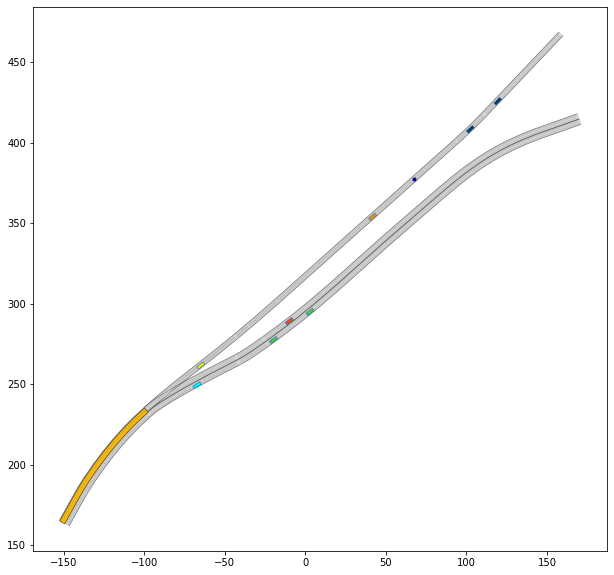

In [8]:
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
#print(visualization_function.group_ids)

import os
import matplotlib.pyplot as plt
from IPython import display
from brute_force import calculate_score
import commonroad.planning
# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object
import scenarios 
import matplotlib.patches as patches
from brute_force import Colorize_groups
import Convert_groups

groups=dict()

"""group_array_time_step_dict = {0: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              1: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              2: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              3: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              4: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              5: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              6: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              7: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              8: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              9: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              10: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              11: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              12: [[321, 318, 327, 328], [311, 35, 315], [318], [320], [322, 323, 324, 326], [331, 330, 328]], 
                              13: [[321, 318, 327], [328, 311, 35, 315], [318,320], [322, 323, 324, 326], [331, 330, 328]],
                              14: [[321, 318, 327], [328, 311, 35, 315], [318,320], [322, 323, 324, 326], [331, 330, 328]],
                              15: [[321, 318, 327], [328, 311, 35, 315], [318,320], [322, 323, 324, 326], [331, 330, 328]],
                              16: [[321, 318, 327], [328, 311, 35, 315], [318,320], [322, 323, 324, 326], [331, 330, 328]],
                              17: [[321, 318, 327], [328, 311, 35, 315], [318,320], [322, 323, 324, 326], [331, 330, 328]],
                              18: [[321, 318, 327], [328, 311, 35, 315], [318,320,322, 323, 324, 326], [331, 330, 328]],
                              19: [[321, 318, 327], [328, 311, 35, 315], [318,320,322, 323, 324, 326], [331, 330, 328]],
                              20: [[321, 318, 327], [328, 311, 35, 315], [318,320,322, 323, 324, 326], [331, 330, 328]],
                              21: [[321, 318, 327], [328, 311, 35, 315], [318,320,322, 323, 324, 326], [331, 330, 328]],
                              22: [[321, 318, 327], [328, 311, 35, 315], [318,320,322, 323, 324, 326], [331, 330, 328]],
                              23: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              24: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              25: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              26: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]],
                              27: [[321, 318, 327,328, 311, 35, 315, 318,320,322, 323, 324, 326, 331, 330, 328]]
                             }"""
group_array_time_step_dict = all_groups

for time_key in group_array_time_step_dict:
    grouparray = group_array_time_step_dict[time_key]
    for group in grouparray:
        if time_key not in groups.keys():
            groups[time_key] = [Convert_groups.conv_to_obj(scenario, planning_problem_set, group)]
        else:
            groups[time_key].append(Convert_groups.conv_to_obj(scenario, planning_problem_set, group))

        
# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 50):
    
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step   
    
    ax = plt.gca()
    
    draw_object(scenario.lanelet_network,draw_params={'time_begin': i}) #, plot_limits=plot_limits)
    time = i
    Colorize_groups.colorize_groups(groups[time], ax, time)
    #raw_object(commonroad.planning.planning_problem.PlanningProblemSet.find_planning_problem_by_id(planning_problem_set, 2), draw_params=draw_params)
    #ect=patches.Rectangle((0,0),5,2,linewidth=1,edgecolor='#880000', facecolor='#998822')
    #x.add_patch(rect)
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()